In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import graphviz 

In [92]:
data=pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

### Decision tree

In [94]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter="random", random_state=30)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Decision Tree accuracy:', accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.7083333333333334


[Text(334.8, 380.52, 'X[7] <= 35.517\nentropy = 0.942\nsamples = 576\nvalue = [369, 207]'),
 Text(167.4, 271.8, 'X[1] <= 169.45\nentropy = 0.834\nsamples = 374\nvalue = [275, 99]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 128.758\nentropy = 0.762\nsamples = 348\nvalue = [271, 77]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.58\nsamples = 267\nvalue = [230, 37]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 1.0\nsamples = 81\nvalue = [41, 40]'),
 Text(251.10000000000002, 163.07999999999998, 'X[5] <= 37.263\nentropy = 0.619\nsamples = 26\nvalue = [4, 22]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.811\nsamples = 16\nvalue = [4, 12]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 130.485\nentropy = 0.997\nsamples = 202\nvalue = [94, 108]'),
 Text(418.5, 163.07999999999998, 'X[5] <= 24.71\nentropy = 0.949\nsamples = 106\nvalue = [67, 39]'),
 Text(376.65000000000003, 54.360000000000014, '

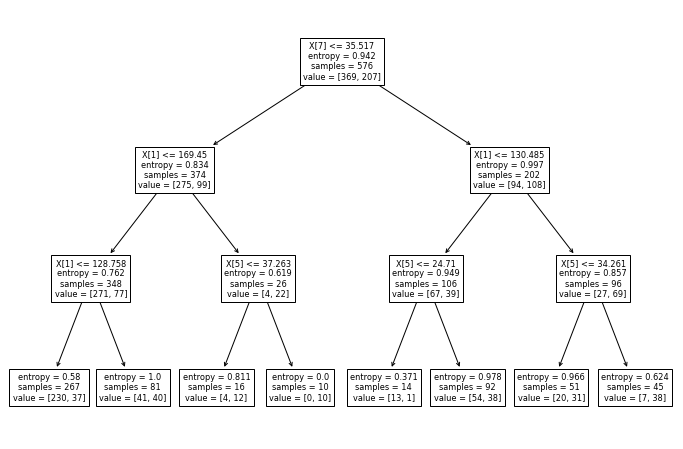

In [95]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train)) 

In [96]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.644789
 2) Age                            0.243870
 3) BMI                            0.111341
 4) DiabetesPedigreeFunction       0.000000
 5) Insulin                        0.000000
 6) SkinThickness                  0.000000
 7) BloodPressure                  0.000000
 8) Pregnancies                    0.000000


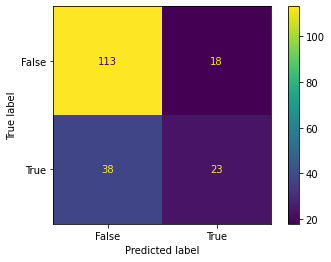

In [97]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

### Random Forest

In [101]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.7708333333333334


In [102]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.257929
 2) BMI                            0.157214
 3) Age                            0.146591
 4) DiabetesPedigreeFunction       0.109497
 5) Pregnancies                    0.092369
 6) BloodPressure                  0.084900
 7) Insulin                        0.077321
 8) SkinThickness                  0.074179


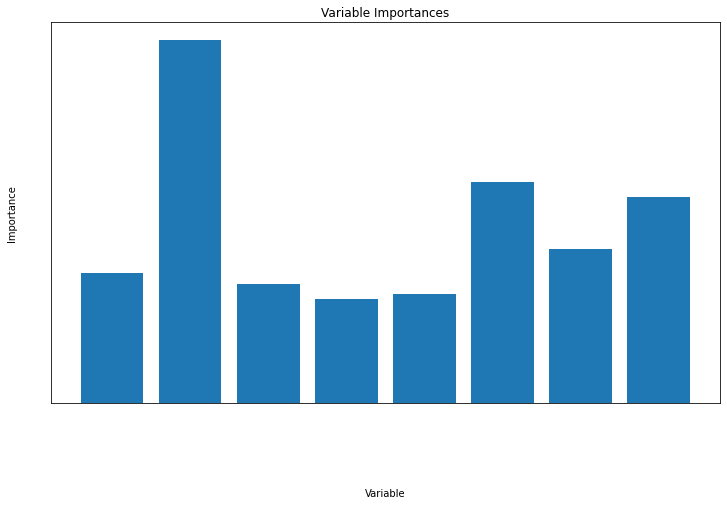

In [103]:
plt.figure(figsize=(12,7))
plt.tick_params(colors='white')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, list(data.columns)[0:8],rotation=30)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

## XG boost

In [104]:
xgb_model = XGBClassifier(eta=0.05, n_estimators=500, max_depth=3,scale_pos_weight=1.9)
xgb_model.fit(x_train,y_train) 
prediction=xgb_model.predict(x_test) 
print('XGboost accuracy:',accuracy_score(prediction,y_test))

C:\Users\Chuxu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost accuracy: 0.7291666666666666


In [105]:
importances = xgb_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.276109
 2) Age                            0.151156
 3) BMI                            0.137922
 4) Insulin                        0.110223
 5) Pregnancies                    0.092862
 6) DiabetesPedigreeFunction       0.084197
 7) BloodPressure                  0.075028
 8) SkinThickness                  0.072503


<Figure size 360x360 with 0 Axes>

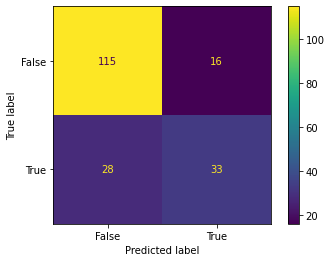

In [106]:
plt.figure(figsize=(5,5))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [107]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

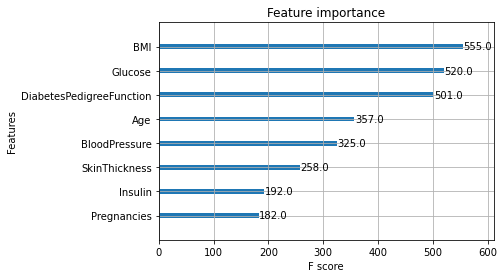

In [108]:
plot_importance(xgb_model)